# TRABAJO FINAL INTEGRADOR

### NOMBRE: GUIDO PETTINARI

### TUTOR: VALERIA SOLIANI

### UNIVERSIDAD: INSTITUTO TECNOLOGICO DE BUENOS AIRES (ITBA)

**El Trabajo se dividirá en**:

    1) Análisis Exploratorio Descriptivo
    2) Feature Engineering o Preparación de Datos
    3) Modelos Predictivos: Probaremos diferentes algoritmos predictivos

### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,make_scorer,f1_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import xgboost as xgb
import seaborn as sns
import numpy as np
from mlxtend.evaluate import lift_score
import csv
from funpymodeling.exploratory import status
import numpy as np

### Load CSVs

In [2]:
data_base = pd.read_csv('data_base.csv')
data_ohe = pd.read_csv('data_ohe.csv')
data_ohe_corr = pd.read_csv('data_ohe_corr.csv')
data_ohe_out = pd.read_csv('data_ohe_out.csv')
data_ohe_corr_out = pd.read_csv('data_ohe_out_corr.csv')
data_out = pd.read_csv('data_out.csv')
data_corr = pd.read_csv('data_corr.csv')
data_out_corr = pd.read_csv('data_out_corr.csv')
data_index = pd.read_csv('data_index.csv')


### Split All DF in Train and Test

In [3]:
data_base_X = data_base.drop(['MonthlyIncome_cat_encode'],axis=1)
data_base_y = data_base[['MonthlyIncome_cat_encode']]
data_ohe_X = data_ohe.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_y = data_ohe[['MonthlyIncome_cat_encode']]
data_ohe_corr_X = data_ohe_corr.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_corr_y = data_ohe_corr[['MonthlyIncome_cat_encode']]
data_ohe_out_X = data_ohe_out.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_out_y = data_ohe_out[['MonthlyIncome_cat_encode']]
data_ohe_corr_out_X = data_ohe_corr_out.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_corr_out_y = data_ohe_corr_out[['MonthlyIncome_cat_encode']]
data_out_X = data_out.drop(['MonthlyIncome_cat_encode'],axis=1)
data_out_y = data_out[['MonthlyIncome_cat_encode']]
data_corr_X = data_corr.drop(['MonthlyIncome_cat_encode'],axis=1)
data_corr_y = data_corr[['MonthlyIncome_cat_encode']]
data_out_corr_X = data_out_corr.drop(['MonthlyIncome_cat_encode'],axis=1)
data_out_corr_y = data_out_corr[['MonthlyIncome_cat_encode']]


In [4]:
# data_base

data_base_X_train, data_base_X_test, data_base_y_train, \
                                     data_base_y_test = train_test_split(data_base_X, data_base_y, test_size=0.3, random_state=42)

#data_ohe
data_ohe_X_train, data_ohe_X_test, data_ohe_y_train, \
                                   data_ohe_y_test = train_test_split(data_ohe_X, data_ohe_y, test_size=0.3, random_state=42)

#data_ohe_corr
data_ohe_corr_X_train, data_ohe_corr_X_test, data_ohe_corr_y_train, \
                       data_ohe_corr_y_test = train_test_split(data_ohe_corr_X, data_ohe_corr_y, test_size=0.3, random_state=42)

# data_ohe_out
data_ohe_out_X_train, data_ohe_out_X_test, data_ohe_out_y_train, \
                      data_ohe_out_y_test = train_test_split(data_ohe_out_X, data_ohe_out_y, test_size=0.3, random_state=42)

# data_ohe_corr_out
data_ohe_corr_out_X_train, data_ohe_corr_out_X_test, data_ohe_corr_out_y_train, \
                           data_ohe_corr_out_y_test = train_test_split(data_ohe_corr_out_X, data_ohe_corr_out_y, test_size=0.3, random_state=42)

# data_out
data_out_X_train, data_out_X_test, data_out_y_train, \
                           data_out_y_test = train_test_split(data_out_X, data_out_y, test_size=0.3, random_state=42)

# data_corr
data_corr_X_train, data_corr_X_test, data_corr_y_train, \
                           data_corr_y_test = train_test_split(data_corr_X, data_corr_y, test_size=0.3, random_state=42)

# data_out_corr
data_out_corr_X_train, data_out_corr_X_test, data_out_corr_y_train, \
                           data_out_corr_y_test = train_test_split(data_out_corr_X, data_out_corr_y, test_size=0.3, random_state=42)

In [ ]:
data_ohe_X_train.describe()

### Random Grid Search

In [ ]:
# Number of trees in random forest
# 
eta = np.arange(0.1,1,0.2)
# Maximum number of levels in tree
max_depth = range(3, 10, 1)
gamma = range(0,100,10)
objective=['multi:softmax']
seed=[10]
num_class=[4]
#lambdas = range(1,50,10)
#alpha =  range(1,50,10)


# Create the random grid
random_grid = {'eta': eta,
               'gamma': gamma,
               'max_depth': max_depth,
               'objective': objective,
               'seed': seed,
               'num_class':num_class}
               #'bootstrap': bootstrap}
print(random_grid)


In [ ]:




scoring = {'lift':make_scorer(lift_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'f1_score':make_scorer(f1_score, average='macro'),
           'accuracy': make_scorer(accuracy_score),
           'recall':make_scorer(recall_score,average='macro'),
           'roc_auc_ovr':'roc_auc_ovr'}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = xgb.XGBClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, 
                               param_grid = random_grid,
                               scoring = scoring,
                               refit='lift',
                               cv = 5, 
                               verbose=1, 
                               n_jobs = -1)


# list dataframes train that Random Forest accepts
list_dataframes_train = [#[data_base_X_train, data_base_X_test],
                         [data_ohe_X_train, data_ohe_y_train],
                         [data_ohe_corr_X_train, data_ohe_corr_y_train],
                         [data_ohe_out_X_train, data_ohe_out_y_train],
                         [data_ohe_corr_out_X_train, data_ohe_corr_out_y_train]
                         #[data_out_X, data_out_y],
                         #[data_corr_X, data_corr_y],
                         #[data_out_corr_X, data_out_corr_y]
                         ]

# list dataframes train that Random Forest accepts
list_dataframes_test = [#[data_base_X_train, data_base_X_test],
                         [data_ohe_X_test, data_ohe_y_test],
                         [data_ohe_corr_X_test, data_ohe_corr_y_test],
                         [data_ohe_out_X_test, data_ohe_out_y_test],
                         [data_ohe_corr_out_X_test, data_ohe_corr_out_y_test]
                         #[data_out_X, data_out_y],
                         #[data_corr_X, data_corr_y],
                         #[data_out_corr_X, data_out_corr_y]
                         ]


list_dataframes_names = ['data_ohe','data_ohe_corr','data_ohe_out','data_ohe_corr_out']

In [ ]:
# Fit the random search model
df = pd.DataFrame()
for i in range(0,len(list_dataframes_train)):
    #Entreno sobre mis dataframes train  
    rf_random.fit(list_dataframes_train[i][0], list_dataframes_train[i][1].values.ravel())
    len_name = len(rf_random.cv_results_['mean_test_accuracy'])
    name = [list_dataframes_names[i]]*len_name

    train_results = pd.concat([
                     pd.DataFrame(name,columns=['dataframe']),
                     pd.DataFrame(rf_random.cv_results_['params']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_lift'],columns=['lift']),          
                     pd.DataFrame(rf_random.cv_results_['mean_test_accuracy'],columns=['accuracy']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_precision'],columns=['precision_score']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_recall'],columns=['recall']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_f1_score'],columns=['f1_score']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_roc_auc_ovr'],columns=['roc_auc_ovr'])],axis=1).sort_values('lift',ascending=False)
    df = df.append(train_results) 
df.to_csv('train_rf_results_v3.csv',index=False)

In [8]:
# A continuación correremos con los parametros que nos dió mejor resultado tanto el training como el testing y los graficaremos 
# con una curva de ROC

# Use the random grid to search for best hyperparameters
# First create the base model to tune



rf = xgb.XGBClassifier(eta= 0.7,
                       gamma= 20,
                       max_depth= 5,
                       objective= 'multi:softmax',
                       seed= 10,
                       num_class= 4)


rf.fit(data_ohe_X_train, data_ohe_y_train)


C:\Users\guido\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\guido\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\guido\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10:21:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.7, gamma=20,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.699999988, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=10, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, ...)

### Classification report

In [9]:
y_pred_tr = rf.predict(data_ohe_X_train)
y_pred_ts = rf.predict(data_ohe_X_test)


print(classification_report(data_ohe_y_train,y_pred_tr))
print(classification_report(data_ohe_y_test,y_pred_ts))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79       279
           1       0.93      0.15      0.25       262
           2       0.62      0.85      0.71       226
           3       0.89      0.94      0.91       262

    accuracy                           0.72      1029
   macro avg       0.78      0.72      0.67      1029
weighted avg       0.78      0.72      0.67      1029

              precision    recall  f1-score   support

           0       0.62      0.97      0.76        90
           1       0.81      0.12      0.22       104
           2       0.67      0.80      0.73       141
           3       0.79      0.88      0.83       106

    accuracy                           0.69       441
   macro avg       0.73      0.69      0.63       441
weighted avg       0.72      0.69      0.64       441



In [10]:
# Con el mejor parametro del grid search paso a predecir
#y_pred_tr = rf_random.predict(X_train)
#accuracy_score = accuracy_score(y_train, y_pred_tr)
#precision_score = precision_score(y_train, y_pred_tr)
#recall_score = recall_score(y_train, y_pred_tr)
#roc_auc_score = roc_auc_score(y_train, y_pred_tr)
#lift_score = lift_score(y_train, y_pred_tr)

pd.unique(data_ohe_y_train['MonthlyIncome_cat_encode'])


array([3, 2, 0, 1], dtype=int64)

C:\Users\guido\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\guido\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


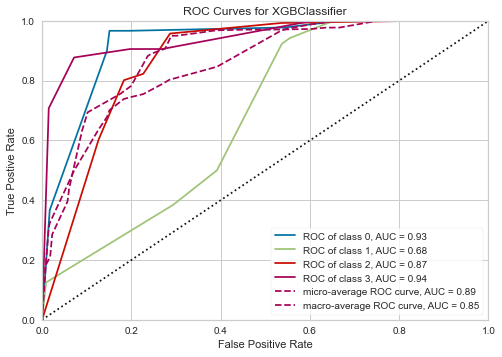

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [11]:
from yellowbrick.classifier import ROCAUC,PrecisionRecallCurve,ClassBalance
from yellowbrick.target import FeatureCorrelation

visualizer = ROCAUC(rf, classes=["0","1","2","3"])

visualizer.fit(data_ohe_X_train,data_ohe_y_train)
visualizer.score(data_ohe_X_test,data_ohe_y_test)
visualizer.show()